# (IQR 기준) salary 변수 이상치 처리
## IQR의 1.5보다 큰 값과 작은 값을 제거

In [1]:
import pandas as pd
data = pd.read_csv('Ex_CEOSalary.csv',encoding='utf-8')

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x12d505e10>, <matplotlib.lines.Line2D object at 0x12d5060e0>], 'caps': [<matplotlib.lines.Line2D object at 0x12d506470>, <matplotlib.lines.Line2D object at 0x12d506680>], 'boxes': [<matplotlib.lines.Line2D object at 0x12d505b40>], 'medians': [<matplotlib.lines.Line2D object at 0x12d506950>], 'fliers': [<matplotlib.lines.Line2D object at 0x12d506c20>], 'means': []})

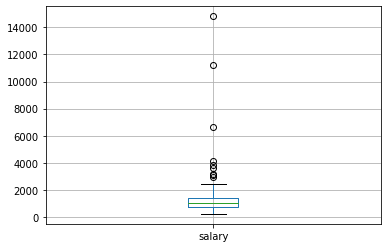

In [2]:
data.boxplot(column='salary',return_type='both')

In [3]:
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary
IQR_salary

671.0

<AxesSubplot:>

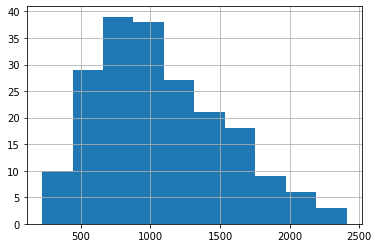

In [4]:
data_IQR = data[(data['salary']<Q3_salary+IQR_salary*1.5)&(data['salary']>Q1_salary-1.5*IQR_salary)]
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>]], dtype=object)

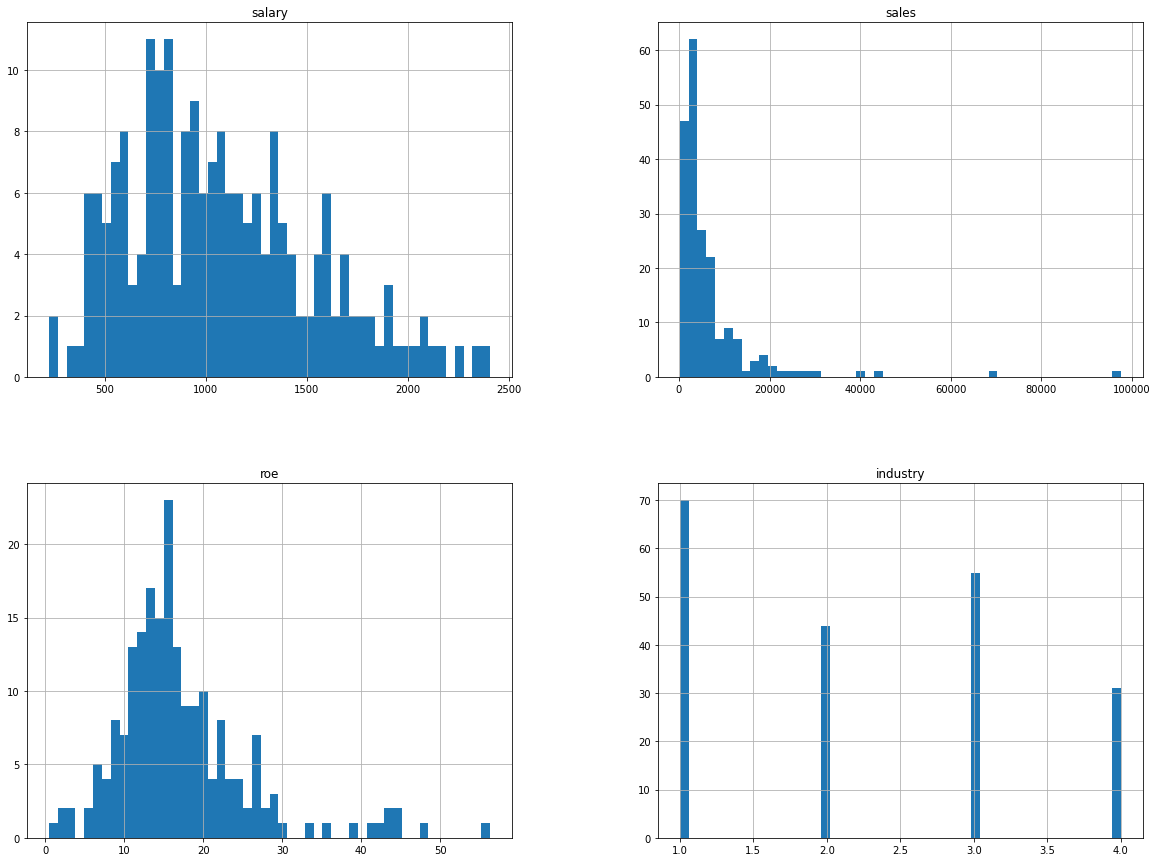

In [5]:
data_IQR.hist(bins=50,figsize=(20,15))

In [7]:
data_IQR.corr()

,salary,sales,roe,industry
salary,1.000000,0.335446,0.289704,-0.202648
sales,0.335446,1.000000,-0.065034,-0.069790
roe,0.289704,-0.065034,1.000000,-0.024423
industry,-0.202648,-0.069790,-0.024423,1.000000


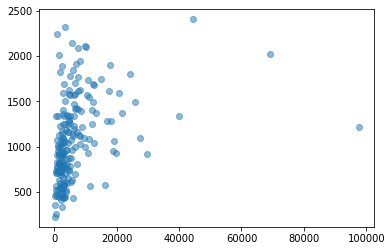

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data_IQR['sales'],data_IQR['salary'],alpha=0.5)
plt.show() # 개선 안 됨

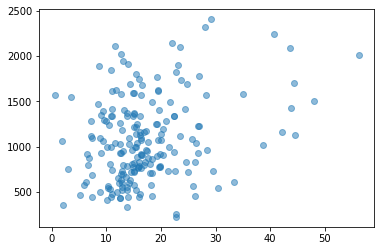

In [9]:
import matplotlib.pyplot as plt
plt.scatter(data_IQR['roe'],data_IQR['salary'],alpha=0.5)
plt.show() # 개선됨

# sales 변수 이상치 처리

In [10]:
Q1_sales = data['sales'].quantile(q=0.25)
Q3_sales = data['sales'].quantile(q=0.75)
IQR_sales = Q3_sales - Q1_sales
IQR_sales

4966.6999511718695

In [11]:
# salary와 sales 이상치 모두 제거
data_IQR = data[(data['salary']<Q3_salary+IQR_salary*1.5)&(data['salary']>Q1_salary-1.5*IQR_salary)&(data['sales']<Q3_sales+IQR_sales*1.5)&(data['sales']>Q1_sales-1.5*IQR_sales)]

<AxesSubplot:>

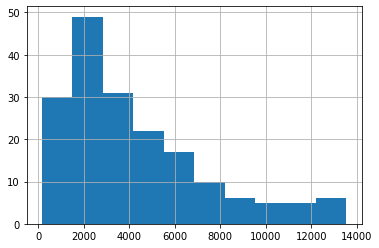

In [12]:
data_IQR['sales'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>]], dtype=object)

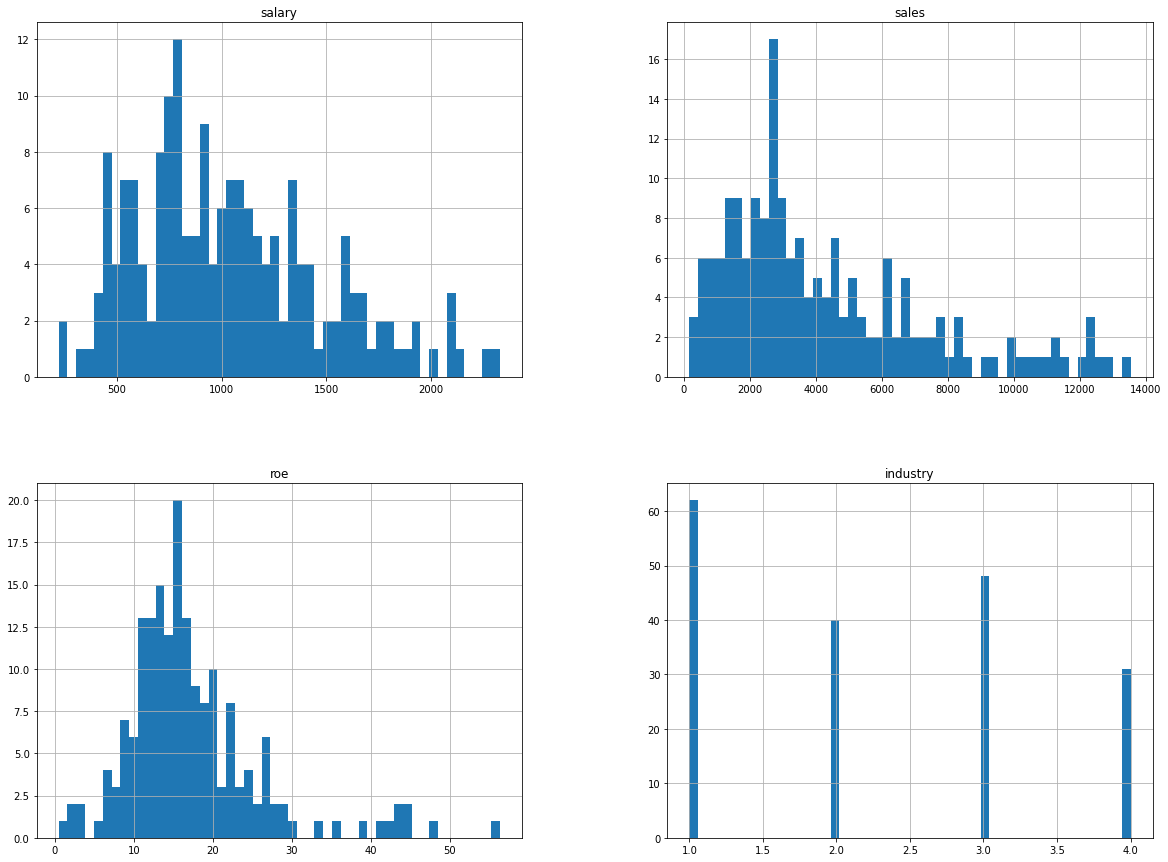

In [24]:
data_IQR.hist(bins=50,figsize=(20,15))

In [25]:
data_IQR.corr()

,salary,sales,roe,industry
salary,1.000000,0.471278,0.299153,-0.223324
sales,0.471278,1.000000,-0.076046,-0.106834
roe,0.299153,-0.076046,1.000000,-0.050202
industry,-0.223324,-0.106834,-0.050202,1.000000
